In [0]:
# -- link google drive
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [21]:
# -- useful imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scipy as sp
from scipy import stats

# data retrival
get the Local Law 88 (ll82) data from the URL: https://data.cityofnewyork.us/api/views/8u86-bviy/rows.csv and read it in with Pandas

download the pluto csv data and store it in your google drive. 

You can find the data here 
https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page

IMPORTANT: store it in the path drive/My Drive/dsps/ with the name pluto_18v2_1.csv

This path and name have to be exact. This way the grader and I will be able to run your notebook without changing anything as long as we also have stored the data in path drive/My Drive/dsps/pluto_18v2_1.csv. This is part of the _reproducibility_ requirement.

## DELIVERABLE 1

In [4]:
# -- set the location of the Local Law 84 file
ll84_name = "https://data.cityofnewyork.us/api/views/8u86-bviy/rows.csv"

# -- read in the Local Law 84 csv file
ll84 = pd.read_csv(ll84_name)

# -- select only Local Law 84 rows with Manhattan as borough
ll84 = ll84[ll84.Borough == "Manhattan"]

In [ ]:
!mkdir drive/My\ Drive/dsps2019

In [388]:
!mv pluto_18v2_1.csv drive/My\ Drive/dsps2019

mv: /Users/fbb/Downloads/nyc_pluto_18v2_1_csv/pluto_18v2_1.csv: No such file or directory


In [4]:
!ls drive/My\ Drive/dsps2019


#!mv             pluto_18v2_1.csv


In [6]:
# -- set the location of the PLUTO file
pl_name = "HW5/drive/My Drive/dsps/pluto_18v2_1.csv"

# -- read in the PLUTO file
pluto = pd.read_csv(pl_name, low_memory=False)

# -- select only PLUTO buildings in Manhattan
pluto = pluto[pluto.borough == "MN"]

# data wrangling
select the data for buildings in Manhattan only from the pluto file (e.g. broadcasting!)

merge the pluto and ll84 dataframes. you will have to choose an appropriate column that both datasets share fo do so. The column may not have the same nbame, but should have the same _variable_.

In [7]:
ll84.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weath

In [8]:
pluto.columns

Index(['borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010', 'schooldist',
       'council', 'zipcode', 'firecomp', 'policeprct', 'healtharea',
       'sanitboro', 'sanitsub', 'address', 'zonedist1', 'zonedist2',
       'zonedist3', 'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2',
       'spdist3', 'ltdheight', 'splitzone', 'bldgclass', 'landuse',
       'easements', 'ownertype', 'ownername', 'lotarea', 'bldgarea', 'comarea',
       'resarea', 'officearea', 'retailarea', 'garagearea', 'strgearea',
       'factryarea', 'otherarea', 'areasource', 'numbldgs', 'numfloors',
       'unitsres', 'unitstotal', 'lotfront', 'lotdepth', 'bldgfront',
       'bldgdepth', 'ext', 'proxcode', 'irrlotcode', 'lottype', 'bsmtcode',
       'assessland', 'assesstot', 'exemptland', 'exempttot', 'yearbuilt',
       'yearalter1', 'yearalter2', 'histdist', 'landmark', 'builtfar',
       'residfar', 'commfar', 'facilfar', 'borocode', 'bbl', 'condono',
       'tract2010', 'xcoord', 'ycoord', 'zonemap', '

## DELIVDERABLE

In [9]:
# -- merge the two dataframes together
ll84pl = ll84.merge(pluto, left_on="BBL - 10 digits", right_on="bbl", how="outer")

In [10]:
ll84pl.shape

(42962, 156)

# data wrangling and exploration

extract the columns listed in the file "columns.txt" from the dataset.


convert the resulting dataset to numerical, converting non-numerical values to NaN. 
drop rows that contain invalid values and save the resulting dataframe. 





In [11]:
goodcols = np.array(pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/HW5/columns.txt").values).flatten()
len(goodcols)

21

In [12]:
ll84pl_reduct = ll84pl[goodcols].copy()
for c  in goodcols:
    ll84pl[c] = pd.to_numeric(ll84pl[c], errors='coerce')    
    ll84pl_reduct[c] = pd.to_numeric(ll84pl[c], errors='coerce')    
ll84pl_reduct.dropna(inplace=True)
ll84pl_reduct.describe().shape, len(goodcols)

((8, 21), 21)


Describe the  datasets resulting from this data cleaning: 

- how many observations have you lost? 

- did any of the features (=columns) but particularly the one you will work -Weather Normalized Site EUI (kBtu/ft²)- have inconsistent distribution between the full and reducted dataset? 

You can approach this question in a number of ways, and you have done this in the  homewors already (with a KS test, and by just looking at uncertainties are the 2 examples you worked out in HW3 and HW4, the Z test might work if you can convince yourself that the full sample is the "population" - up to you! a quick google search would probably describe many more ways. Choose _two_ ways, describe what each does and why it is appropriate. Compare the results (indeed I did it in 4 ways and did not always get consistent results! each of these meathods measures a slightly different thing).



In [13]:
ll84pl[goodcols].describe()

,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),...,Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
count,5176.000000,5176.000000,5176.000000,4057.000000,5122.000000,4619.000000,4899.000000,4070.000000,4619.000000,5.101000e+03,...,5.176000e+03,3.388000e+03,3388.000000,5122.000000,4.290000e+04,42844.000000,42844.000000,42898.000000,42898.000000,42898.000000
mean,1943.956723,1.056221,98.469861,58.689426,252.626045,266.941373,10.414227,0.411818,381.910067,8.584119e+06,...,2.088364e+05,1.481517e+04,94.268548,364.565502,4.301289e+04,1.113762,5.872763,22.280876,25.351858,1055.207096
std,33.123462,0.773553,8.486776,30.809480,3124.750511,3277.960226,58.764605,2.624555,3987.815401,2.498918e+07,...,3.109891e+05,1.483005e+05,1126.541657,3802.615408,1.664784e+05,1.383727,6.189731,92.373077,95.386177,993.277780
min,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1920.000000,1.000000,100.000000,33.000000,61.900000,64.800000,4.800000,0.000000,110.750000,1.540483e+06,...,7.230700e+04,2.375100e+03,22.580000,106.800000,4.390000e+03,1.000000,3.000000,1.000000,2.000000,0.000000
50%,1930.000000,1.000000,100.000000,66.000000,77.200000,80.800000,7.300000,0.300000,143.100000,3.180848e+06,...,1.150115e+05,4.327050e+03,35.925000,139.300000,8.875000e+03,1.000000,5.000000,6.000000,8.000000,1968.000000
75%,1967.000000,1.000000,100.000000,85.000000,98.400000,102.000000,12.400000,0.600000,188.100000,7.265680e+06,...,2.136252e+05,8.308225e+03,53.855000,184.975000,2.321050e+04,1.000000,6.000000,18.000000,20.000000,1988.000000
max,2016.000000,35.000000,100.000000,100.000000,126307.400000,126307.400000,4074.900000,131.000000,152001.300000,1.037256e+09,...,8.942176e+06,6.376003e+06,57699.300000,152001.300000,1.343508e+07,159.000000,104.000000,8764.000000,8812.000000,2018.000000


In [14]:
ll84pl_reduct.describe()

,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),...,Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
count,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2.044000e+03,...,2.044000e+03,2.044000e+03,2044.000000,2044.000000,2.044000e+03,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000
mean,1944.097358,1.026419,99.060665,57.454501,179.519472,182.952446,10.828376,0.347701,282.695205,7.417714e+06,...,1.834298e+05,1.520801e+04,86.745225,280.406898,1.743071e+05,1.136497,14.504892,86.314579,99.047456,1094.831703
std,34.124614,0.367935,5.202529,30.424238,3024.806998,3024.763020,90.161639,0.386811,3746.045382,2.721299e+07,...,2.516655e+05,1.228927e+05,488.899493,3749.437950,2.334882e+05,0.695738,9.104346,123.580062,125.353668,989.810792
min,1827.000000,1.000000,0.000000,1.000000,2.600000,2.600000,0.000000,0.000000,5.600000,1.501000e+02,...,1.995400e+04,0.000000e+00,0.000000,6.200000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1920.000000,1.000000,100.000000,33.000000,63.700000,66.700000,4.500000,0.000000,109.800000,1.384589e+06,...,6.933925e+04,2.506025e+03,25.217500,106.425000,6.563200e+04,1.000000,8.000000,0.000000,37.000000,0.000000
50%,1929.000000,1.000000,100.000000,64.000000,77.650000,81.300000,6.800000,0.300000,139.300000,2.772684e+06,...,1.033400e+05,4.410800e+03,37.535000,136.500000,1.009690e+05,1.000000,12.000000,60.000000,67.000000,1980.000000
75%,1970.000000,1.000000,100.000000,83.000000,98.125000,101.625000,11.800000,0.600000,181.725000,6.004705e+06,...,1.852130e+05,8.151900e+03,56.857500,179.825000,1.779970e+05,1.000000,17.000000,104.000000,115.000000,1988.000000
max,2016.000000,12.000000,100.000000,100.000000,126307.400000,126307.400000,4074.900000,8.400000,152001.300000,1.037256e+09,...,2.577575e+06,3.414616e+06,11175.440000,152001.300000,2.689635e+06,14.000000,66.000000,1689.000000,1706.000000,2017.000000


## DELIVERABLE


In [17]:
print("lost buildings: ", ll84pl[goodcols].shape[0] - ll84pl_reduct.shape[0], 
      "({:.2f}\%)".format((ll84pl[goodcols].shape[0] - ll84pl_reduct.shape[0]) * 100 / 
                          ll84pl[goodcols].shape[0]))

lost buildings:  40918 (95.24\%)


## DELIVERABLE 


# SET ALPHA CONFIDENCE
alpha = 0.05
 ### this is important. if it is not done before the test results are discussed subtract 0.5 points  

# DELIVERABLE:
at least 2 tests on at least the column "Weather Normalized Site EUI (kBtu/ft²) ". Discuss the tset results:the diffrent tests test different things: the 

In [27]:
# OVERLAP OF UNCERTAINTIES
for g in goodcols:
    if np.abs(ll84pl_reduct[g].mean() - ll84pl[g].mean())  >\
                2.0 * (ll84pl_reduct[g].std() + ll84pl[g].std()):
        print ("{:60}".format(g), 
               "{:.1f} +/- {:.1f} not consistent with {:.1f} +/- {:.1f}".format(
            ll84pl[g].mean(), ll84pl[g].std(), ll84pl_reduct[g].mean(), ll84pl_reduct[g].std()))

for no  distributions there is overlap of uncertainties at 64% - this is a very weak test, and no issues are highlighted

In [28]:
for g in goodcols:
    z = np.abs(ll84pl_reduct[g].mean() - ll84pl[g].mean()) / (ll84pl[g].std() /
                                                        np.sqrt(len(ll84pl_reduct[g])))
    if z > 2:
        print ("{:40}\n".format(g), 
               "           z={:.2f} {:.1f} +/- {:.1f} not consistent with {:.1f} +/- {:.1f}".format(z,
            ll84pl[g].mean(), ll84pl[g].std(), ll84pl_reduct[g].mean(), ll84pl_reduct[g].std()))

Occupancy                               
            z=3.15 98.5 +/- 8.5 not consistent with 99.1 +/- 5.2
Electricity Use - Grid Purchase (kBtu)  
            z=2.11 8584119.0 +/- 24989175.8 not consistent with 7417714.2 +/- 27212995.0
Property GFA - Self-Reported (ft²)      
            z=3.69 208836.4 +/- 310989.1 not consistent with 183429.8 +/- 251665.5
bldgarea                                
            z=35.66 43012.9 +/- 166478.4 not consistent with 174307.1 +/- 233488.2
numfloors                               
            z=63.05 5.9 +/- 6.2 not consistent with 14.5 +/- 9.1
unitsres                                
            z=31.34 22.3 +/- 92.4 not consistent with 86.3 +/- 123.6
unitstotal                              
            z=34.93 25.4 +/- 95.4 not consistent with 99.0 +/- 125.4


##### Z test: tests the difference of means only:
The z-test is appropriate because the reducted data is a subsample of the original dataset, which could be treated as a population since it is a superset and it has a known variance,
Several featurws have inconsistent means between the original and reducred test, but the Weather Normalized Site EUI (kBtu/ft²)  is not one of them.

In [29]:
# KS 2 sample test
for g in goodcols:
    if sp.stats.ks_2samp(ll84pl_reduct[g],
                         ll84pl[g])[1] < 0.05:
        print ("{:60}\n".format(g), 
               "         p-value {:.2f}".format(sp.stats.ks_2samp(ll84pl_reduct[g],
                                                                  ll84pl[g])[1]),
               "{:.1f} +/- {:.1f} not consistent with {:.1f} +/- {:.1f}".format(
            ll84pl[g].mean(), ll84pl[g].std(), ll84pl_reduct[g].mean(), ll84pl_reduct[g].std()))

Year Built                                                  
          p-value 0.00 1944.0 +/- 33.1 not consistent with 1944.1 +/- 34.1
Number of Buildings - Self-reported                         
          p-value 0.00 1.1 +/- 0.8 not consistent with 1.0 +/- 0.4
Occupancy                                                   
          p-value 0.00 98.5 +/- 8.5 not consistent with 99.1 +/- 5.2
ENERGY STAR Score                                           
          p-value 0.00 58.7 +/- 30.8 not consistent with 57.5 +/- 30.4
Site EUI (kBtu/ft²)                                         
          p-value 0.00 252.6 +/- 3124.8 not consistent with 179.5 +/- 3024.8
Weather Normalized Site EUI (kBtu/ft²)                      
          p-value 0.00 266.9 +/- 3278.0 not consistent with 183.0 +/- 3024.8
Weather Normalized Site Electricity Intensity (kWh/ft²)     
          p-value 0.00 10.4 +/- 58.8 not consistent with 10.8 +/- 90.2
Weather Normalized Site Natural Gas Intensity (therms/ft²)  
     

##### KS test:
the KS test is also biased toward the mean, but it is a more general test which knows about the sample size. In this case it is not entirely appropriate to treat the original and reducted dataset as 2 samples as tbhye are not inepemdent (since the reducted is extracted from the original) but if we assume this dependency is small we can use the= test.

The test reveals a significant inconsistency (p<0.05) 

Regardless of what you found above, plot the distribution of the _log base 10_ of the weather-normalized site energy consumption (WNEC) in the for all values larger than 0.1 (such that log10(min) is -1) for the entire dataset and for the reducted one: do you think inference on this feature would be affected by this way of dealing with missing data affects the result?



/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


(-1, 7)

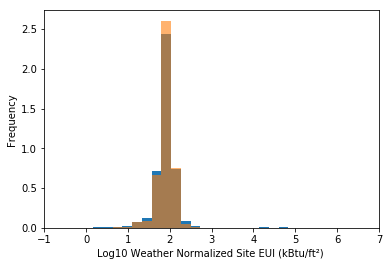

In [30]:
np.log10(ll84pl["Weather Normalized Site EUI (kBtu/ft²)"]
        ).plot(kind="hist", bins=30, density=1, range=[-1, 6])
np.log10(ll84pl_reduct["Weather Normalized Site EUI (kBtu/ft²)"]
        ).plot(kind="hist", bins=30, density=1, range=[-1, 6], alpha=0.6)
pl.xlabel("Log10 Weather Normalized Site EUI (kBtu/ft²) ");
pl.xlim(-1, 7)

Figure 1: The consumption (log10(Weather Normalized Site EUI (kBtu/ft²)))of Manhattan buildibgd can be extracted from thr LL84 dataset in Manhattan. After removing missing data by removing each observation with missing data in any relevant feature (as defined by ```goodcols```. The disutributions in the original and reducted dataset do not show obvious difference. However, a KS statistical test reveals that there is a significance difference (at thde 2-sigma level).
 

# 667 and extra credit
plot a "scatter matrix" of the selected columns. Identify 4 promising "scaling laws" and plot them separately (a scatter plot of column1 vs column2). Does it make sense that there should be a scaling law between the 2 variables? 

which features should be strongly correlated or identical but are not? discuss

([this](https://stackoverflow.com/questions/26975089/making-the-labels-of-the-scatterplot-vertical-and-horizontal-in-pandas) stackoverflow may come in handy)

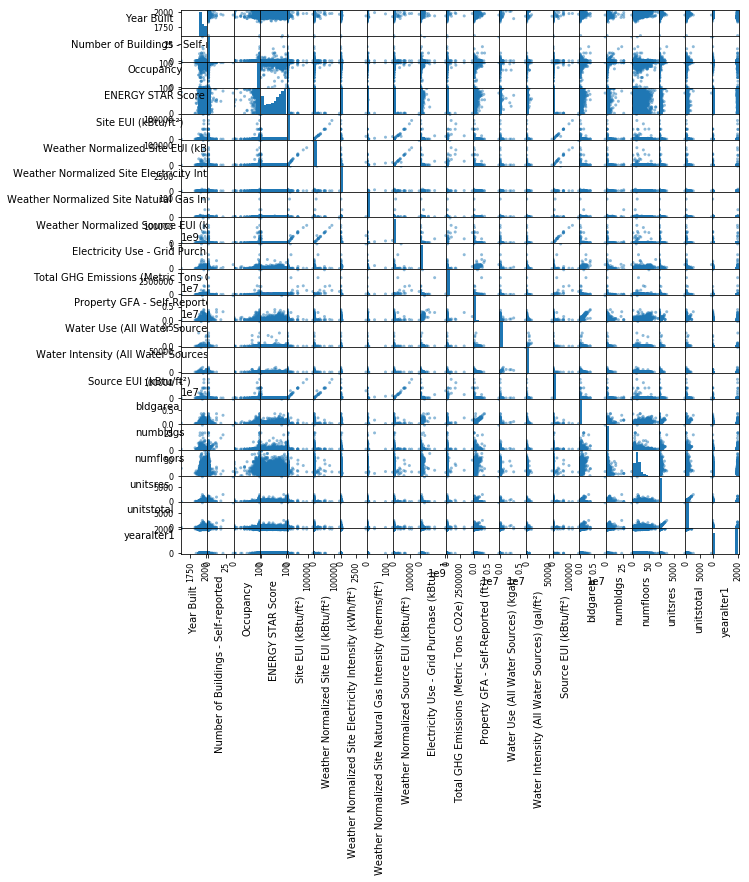

In [327]:
axs = pd.plotting.scatter_matrix(ll84pl[goodcols], figsize=(10,10));
for x in range(len(axs)):
    for y in range(len(axs)):
        if x == len(axs) - 1:
            #to make x axis name vertical  
            axs[x, y].xaxis.label.set_rotation(90)
        if y == 0:    
            axs[x, y].yaxis.label.set_rotation(0)
        

**Figure 2**
The correlation matrix of all features in the LL84 and Pluto datasets for Manhattan from 2018 data.  Some feature that are expected to be identical, for example the number of buildings which appears in both datasets. Hoever, in the LL84 these data are self reported and the visible difference in the 2 data may be attribute to inaccurate self-reporting.

The energy consumption shows trends: e.g. the linear-loking dependency of 'Weather Normalized Site EUI (kBtu/ft²)' 


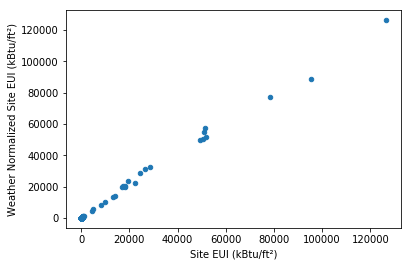

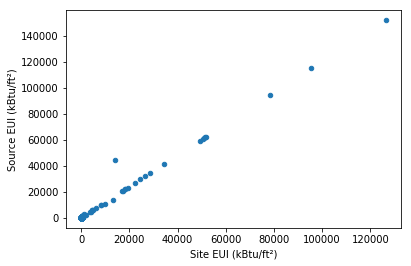

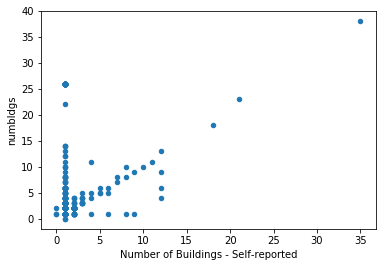

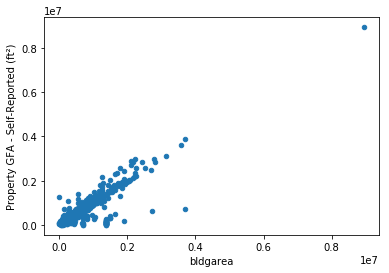

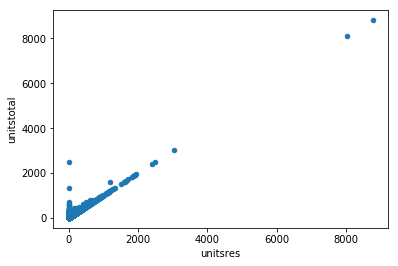

In [31]:
ll84pl.plot(x='Site EUI (kBtu/ft²)', y='Weather Normalized Site EUI (kBtu/ft²)', 
            kind='scatter')
ll84pl.plot(x='Site EUI (kBtu/ft²)', y='Source EUI (kBtu/ft²)', 
            kind='scatter')
ll84pl.plot(x='Number of Buildings - Self-reported', y='numbldgs', 
            kind='scatter')
ll84pl.plot(x='bldgarea', y='Property GFA - Self-Reported (ft²)', 
            kind='scatter')
ll84pl.plot(x='unitsres', y='unitstotal', 
            kind='scatter')

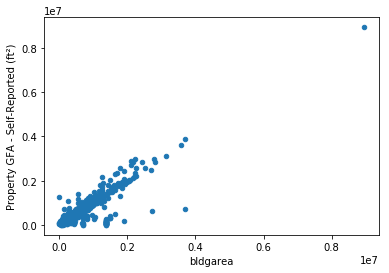

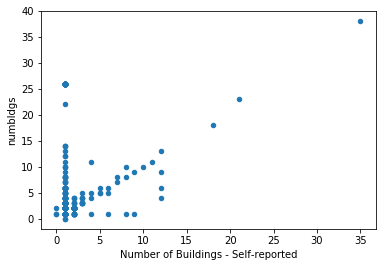

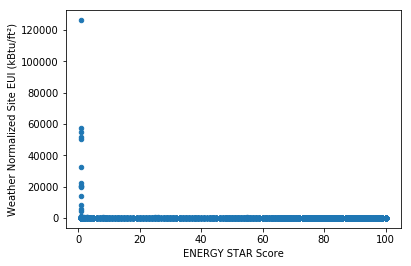

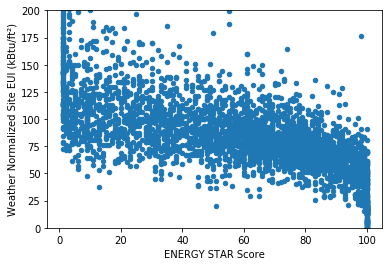

In [32]:
ll84pl.plot(x='bldgarea', y='Property GFA - Self-Reported (ft²)', 
            kind='scatter')
ll84pl.plot(x='Number of Buildings - Self-reported', y='numbldgs', kind='scatter');

ll84pl.plot(x='ENERGY STAR Score', y='Weather Normalized Site EUI (kBtu/ft²)', 
            kind='scatter');


ll84pl.plot(x='ENERGY STAR Score', y='Weather Normalized Site EUI (kBtu/ft²)', 
            kind='scatter');
pl.ylim(0, 200);

At last, from the original dataset remove only the columns that are NaN in the column "Weather Normalized Site EUI (kBtu/ft²)"

## DELIVERABLE

In [354]:
# -- drop buildings for which WN Site EUI is NaN
wnec = "Weather Normalized Site EUI (kBtu/ft²)"
ll84pl.dropna(subset=[wnec], inplace=True)
ll84pl.shape

(4619, 156)

/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


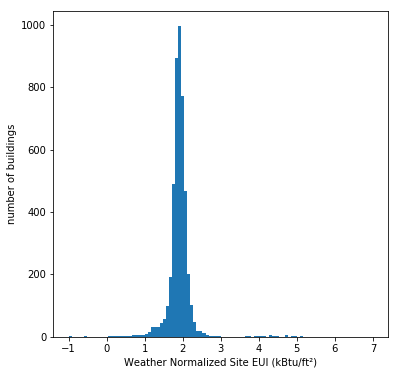

In [242]:
# -- plot a histogram of the log10 WN Site EUI
fig, ax = plt.subplots(figsize=(6, 6))
ax.hist(np.log10(ll84pl[col]), range=[-1, 7], bins=100)
ax.set_ylabel("number of buildings")
ax.set_xlabel(col)
fig.canvas.draw()

## Analysis: Owner investigation 
Find owner of the single most energy consuming building, as measured by the "Site Weather Normalized EUI per unit area ". Find all the buildings that they own. 


show the weather-normalized site energy consumption and the owner name for the top 30 consuming buildings in Manhattan

# DELIVERABLE

In [366]:
# -- sort by WN Site EUI and print owners of top 10 energy consumers
ll84pl.sort_values(col, ascending=False)[[col, "ownername"]][:30]

,Weather Normalized Site EUI (kBtu/ft²),ownername
3606,126307.4,ST MARYS HOME FOR GIR
2972,88701.1,ROLEX RLTY CO INC
3092,77493.8,950 THIRD AVENUE LLC
2882,57361.3,"58 WEST 58TH UNITS,"
1979,54748.3,ANTHONY PAUL GIORGIO
2879,51697.6,SOLOVIEFF REALTY CO.
2848,50621.4,
3082,49620.8,136 E 56TH ST OWNERS
2974,32268.7,"MIKEONE EK EAST 53, L"
1872,31552.6,THE ABBEY CONDOMINIUM


In [367]:
highest1build = ll84pl.sort_values(col, 
                ascending=False)[[col, "ownername"]].ownername.values[0]

In [368]:
print("Owner of the hisghest consuming building:",
      ll84pl[ll84pl.ownername == highest1build]["Property Name"].values[0])

Owner of the hisghest consuming building: St. Mary's Home for Working Girls


In [376]:
print("They own {} buildings".format((
    ll84pl.ownername == ll84pl[ll84pl.ownername == 
                        highest1build]["ownername"].values[0]).sum()))


They own 1 buildings


## deliverable : 
For all owners that own more than one building, find the average consumption for buildings owned by the same owner. Your dataframe should have 2 columns called _Weather Normalized Site EUI (kBtu/ft²)_	and _counts_

In [377]:
ll84plgroup = ll84pl[[col, "ownername"]].groupby("ownername")
ll84plgroup.count() > 1
ll84groupedByOwner = ll84plgroup.mean()[ll84plgroup.count() > 1].dropna(
            ).sort_values(by=col, ascending=False).merge(
                ll84plgroup.count()[ll84plgroup.count() > 1].dropna(
            ), left_index=True, right_index=True).rename(
columns = {col+"_x" : col, col+"_y" : "counts"})
ll84groupedByOwner[:10]

,Weather Normalized Site EUI (kBtu/ft²),counts
ownername,,
COLUMBIA UNIVERSITY,1459.233333,3.0
373-381 PAS ASSOCIATE,684.350000,2.0
MOUNT SINAI HOSPITAL,382.000000,2.0
PRESBYTERIAN HSP CITY,332.650000,2.0
BETH ISRAEL HOSPITAL,330.300000,2.0
NEW YORK UNIVERSITY,280.207143,42.0
78/79 YORK ASSOCIATES,256.900000,3.0
MEMORIAL SLOAN-KETTER,244.200000,2.0
THE ANIMAL MEDICAL CE,227.450000,2.0


Who owns the most buildings? Columbia University

In [379]:
ll84groupedByOwner.sort_values("counts", ascending=False)[:10]

,Weather Normalized Site EUI (kBtu/ft²),counts
ownername,,
,195.878099,484.0
TRUSTEES OF COLUMBIA,43.086667,45.0
OWNER / AGENT,85.558140,43.0
NEW YORK UNIVERSITY,280.207143,42.0
ROYAL CHARTER PROPERT,50.854545,11.0
DUNBAR OWNER LLC,121.285714,7.0
THE TRUSTEES OF COLUM,57.728571,7.0
AKAM ASSOCIATES,83.083333,6.0
YESHIVA UNIVERSITY,123.250000,6.0


In [381]:
print("{} owns the buildings that on average consume the most".format(ll84groupedByOwner.index[0]))

COLUMBIA UNIVERSITY owns the buildings that on average consume the most


In [382]:
print("{} owns the most buildings".format(ll84groupedByOwner.sort_values("counts", ascending=False).index[1]))

TRUSTEES OF COLUMBIA owns the most buildings
